# Logistic Regression
> Predict aircraft damage based on columns and see which columns affect it more

### Import libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import LabelEncoder

In [58]:
X_train=pd.read_csv('../Data/x_train.csv')
X_test=pd.read_csv('../Data/x_test.csv')
y_train=pd.read_csv('../Data/y_train.csv')
y_test=pd.read_csv('../Data/y_test.csv')

### Encode categorical values 

In [59]:
X_train = X_train.drop(['EventID', 'Latitude', 'Longitude', 'TotalFatalInjuries',
         'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured', 'TotalInjuries',
         'EventDate', 'Year', 'Country', 'InjurySeverity', 'InvestigationType', 'ReportStatus'],axis=1)
X_test = X_test.drop(['EventID', 'Latitude', 'Longitude', 'TotalFatalInjuries',
         'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured', 'TotalInjuries',
         'EventDate', 'Year', 'Country', 'InjurySeverity', 'InvestigationType', 'ReportStatus'],axis=1)

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Converting categorical values to numerical
X_train['WeatherCondition'] = labelencoder.fit_transform(X_train['WeatherCondition'])
X_train['BroadPhaseOfFlight'] = labelencoder.fit_transform(X_train['BroadPhaseOfFlight'])
X_train['PurposeOfFlight'] = labelencoder.fit_transform(X_train['PurposeOfFlight'])
X_train['EngineType'] = labelencoder.fit_transform(X_train['EngineType'])
y_train = labelencoder.fit_transform(y_train)

X_test['WeatherCondition'] = labelencoder.fit_transform(X_test['WeatherCondition'])
X_test['BroadPhaseOfFlight'] = labelencoder.fit_transform(X_test['BroadPhaseOfFlight'])
X_test['PurposeOfFlight'] = labelencoder.fit_transform(X_test['PurposeOfFlight'])
X_test['EngineType'] = labelencoder.fit_transform(X_test['EngineType'])
y_test = labelencoder.fit_transform(y_test)

### Fit into logistic regression model

In [60]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 2828, multi_class="multinomial")
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2828,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Print accuracy scores

In [61]:
predictions = logreg.predict(X_test)
print(classification_report(y_test,predictions))
score = logreg.score(X_test, y_test)
print("Mean Accuracy: ", score*100)

              precision    recall  f1-score   support

           0       0.56      0.18      0.28      5200
           1       0.00      0.00      0.00       772
           2       0.74      0.96      0.84     17053
           3       0.00      0.00      0.00       718

    accuracy                           0.73     23743
   macro avg       0.33      0.29      0.28     23743
weighted avg       0.66      0.73      0.66     23743

Mean Accuracy:  73.14998104704544


## Recursive Feature Elimination with Cross-validation
> To find out the rankings of columns and optimal number of columns. 

Optimal number of features : 3


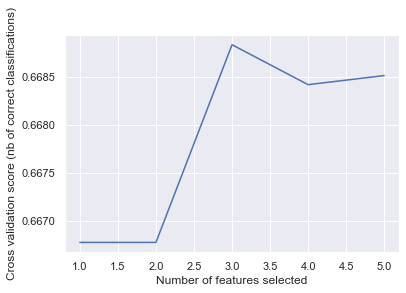

In [62]:
rfecv = RFECV(estimator=logreg, step=1, scoring='f1_weighted', cv = StratifiedKFold(10))
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Drop non-important features

In [63]:
X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace = True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace = True)

In [64]:
print(X_train.columns)
print(X_test.columns)

Index(['WeatherCondition', 'PurposeOfFlight', 'EngineType'], dtype='object')
Index(['WeatherCondition', 'PurposeOfFlight', 'EngineType'], dtype='object')


### Fit into logistic regression again with important features

In [65]:
logRegv2 = LogisticRegression(solver='lbfgs', max_iter = 2828, multi_class="multinomial")
logRegv2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2828,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Print accuracy scores 

In [66]:
prediction = logRegv2.predict(X_test)
print(classification_report(y_test,prediction))

score = logRegv2.score(X_test, y_test)
print("Mean Accuracy: ", score*100)

              precision    recall  f1-score   support

           0       0.56      0.19      0.28      5200
           1       0.00      0.00      0.00       772
           2       0.74      0.96      0.84     17053
           3       0.00      0.00      0.00       718

    accuracy                           0.73     23743
   macro avg       0.33      0.29      0.28     23743
weighted avg       0.66      0.73      0.66     23743

Mean Accuracy:  73.14576927936655
